In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [87]:
# Import necessary libraries

data = pd.read_csv('train.csv')

# Data Preprocessing
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [88]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)

# Convert categorical features to numerical values
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop non-relevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_14008\3660121929.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14008\3660121929.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [67]:
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [68]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 79.82%


In [93]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'confusin matrix: \n{conf_matrix}')

confusin matrix: 
[[114  20]
 [ 25  64]]


In [90]:

print('\nClassification Report:')
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



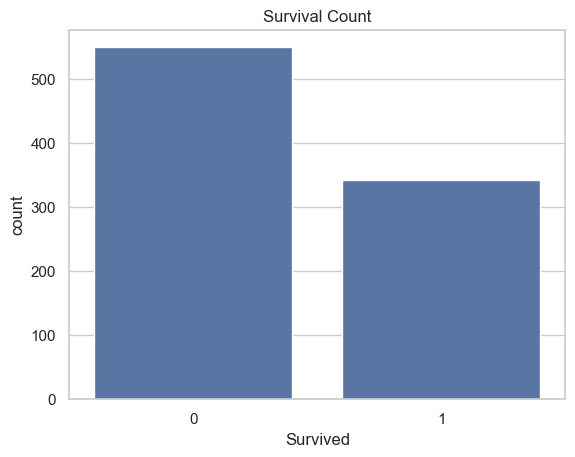

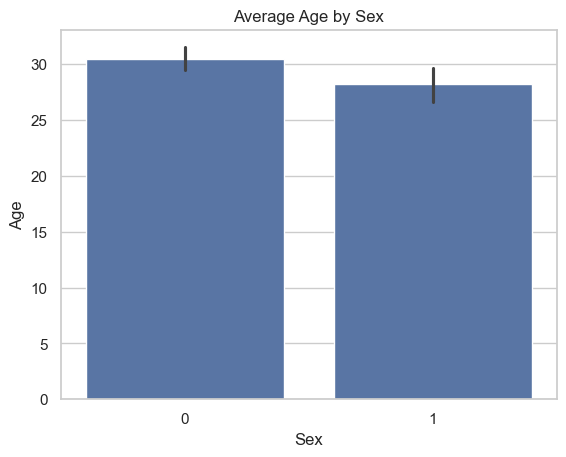

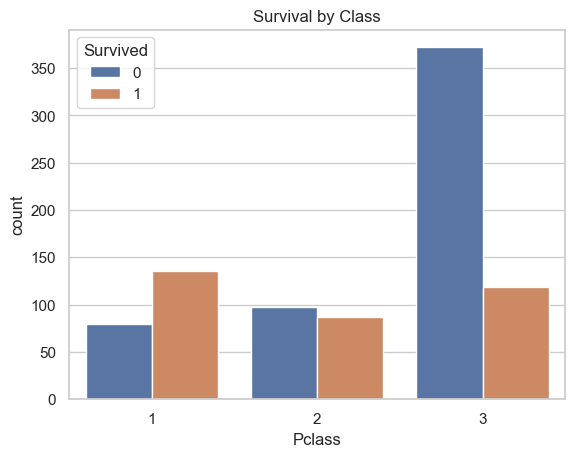

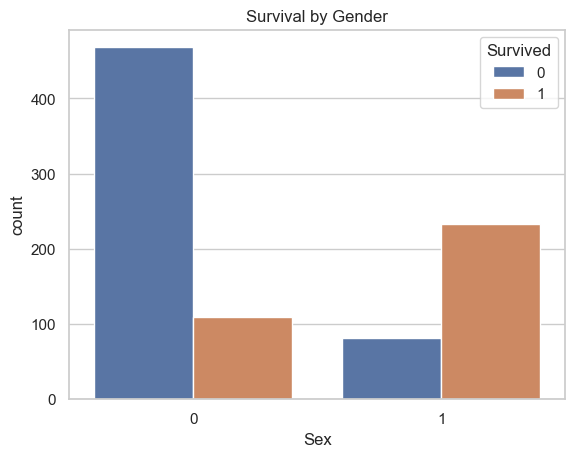

In [71]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

sns.barplot(x='Sex', y='Age', data=data)
plt.title('Average Age by Sex')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\597562302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Survived', y='Age', palette='Set2')


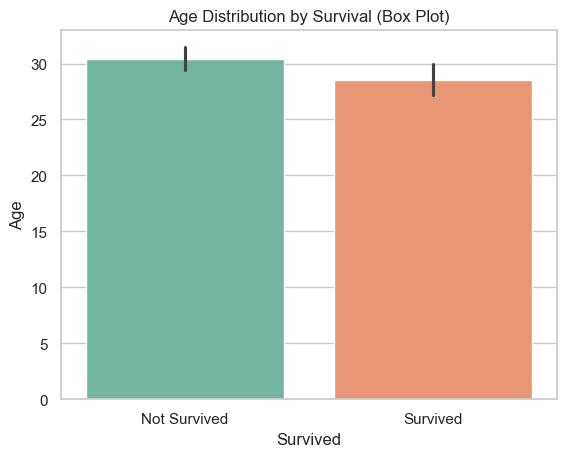

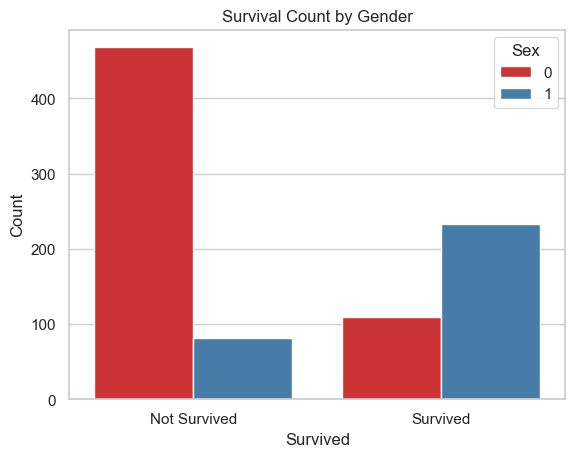

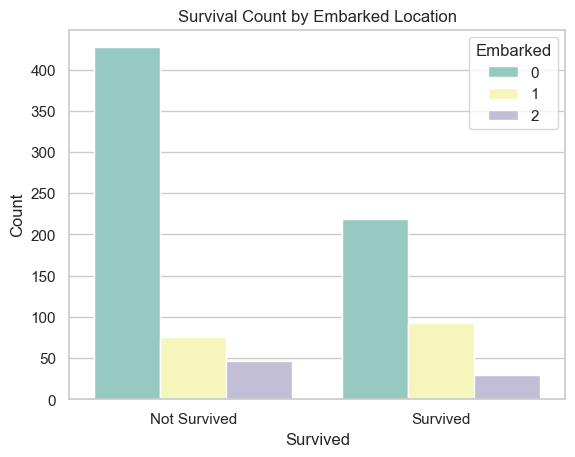

C:\Users\HP\AppData\Local\Temp\ipykernel_14008\597562302.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients['Coefficient'], palette='Blues_d')


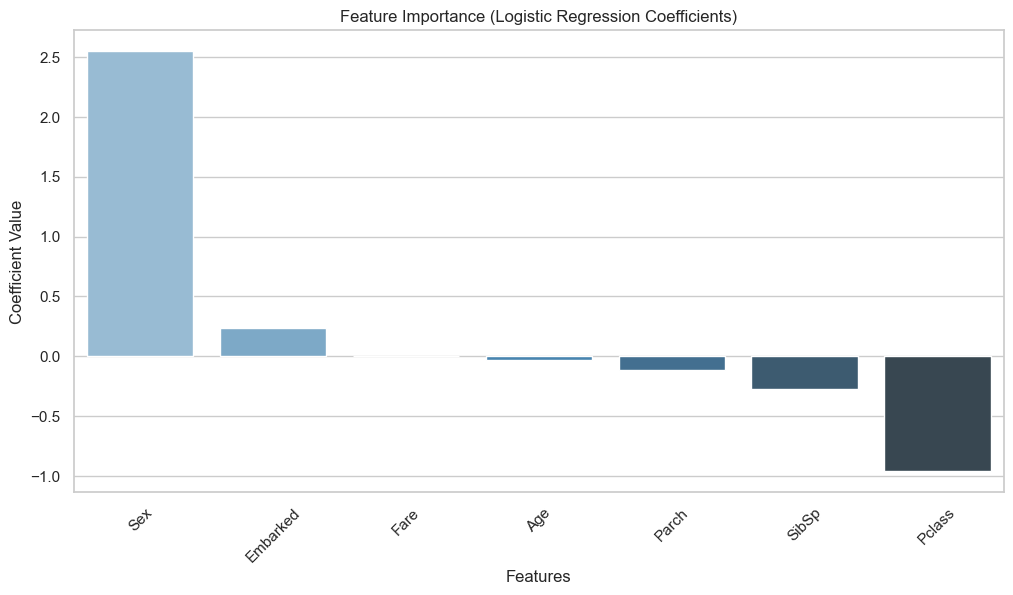

In [ ]:
# Visualization 1: Age Distribution by Survival Status
# plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Survived', y='Age', palette='Set2')
plt.title('Age Distribution by Survival (Box Plot)')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Visualization 2: Gender Distribution by Survival
# plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Sex', data=data, palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# # Visualization 3: Embarked Location Distribution by Survival
# plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Embarked', data=data, palette='Set3')
plt.title('Survival Count by Embarked Location')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

